# Análisis Exploratorio de la Valoraciones de Amazon Echo

## Importación de Librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
import utils 

In [3]:
data = pd.read_csv('../Data/amazon_alexa.tsv',sep='\t')

In [5]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


 Contamos con 3150 observaciones y 5 variables dos de tipo entero y tres de tipo objeto

   * `rating` -> corresponde a la calificacion de que se le proporciono al producto [1,2,3,4,5]
   * `date`  -> la fecha en cuando se califico 
   * `variation` -> corresponde a la variante del producto 
   * `varified_reaviews` -> valoraciones que escribio la persona 
   * `feedback` -> valoracion numerio positivo 1 o negativo 0

 
  

In [7]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Se puede ver que las valoraciones rating el 50 % tienen valoraciones de 5 estrellas por tanto 

In [8]:
data.isnull().mean()

rating              0.000000
date                0.000000
variation           0.000000
verified_reviews    0.000317
feedback            0.000000
dtype: float64

In [4]:
data[data.verified_reviews.isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


Dado que esta muestra no nos aporta procederemos a eliminarla

In [4]:
# delete 
data.drop(index=473,inplace=True)

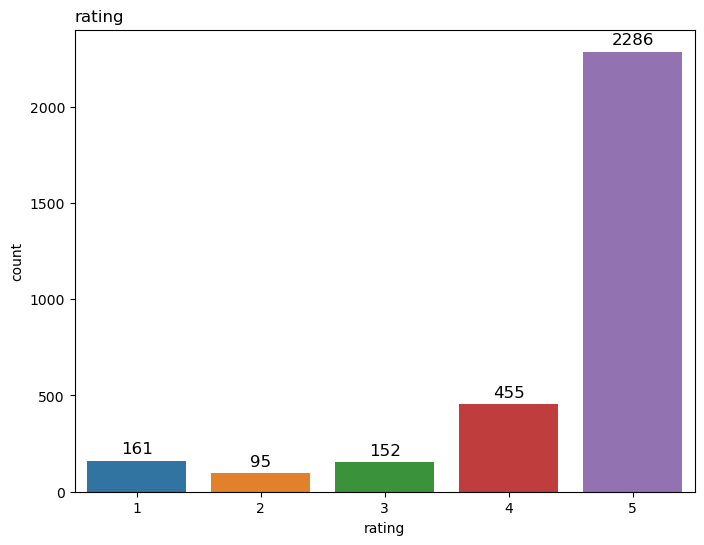

In [12]:
utils.barplot(data,column='rating',rotation=False)

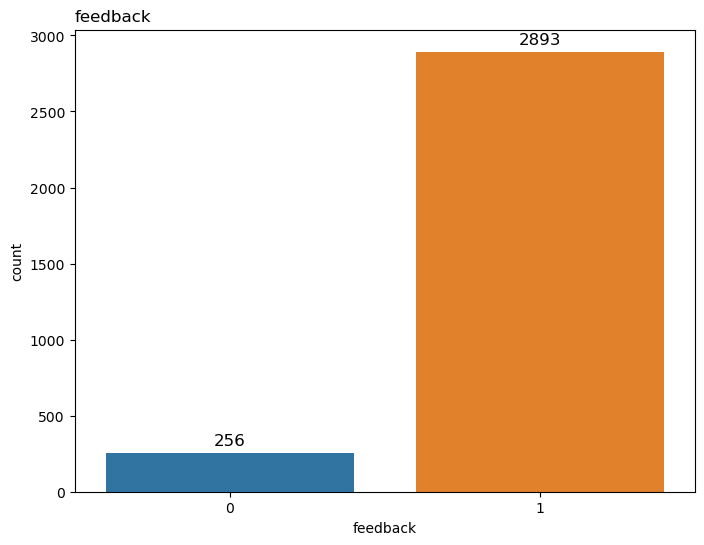

In [13]:
utils.barplot(data,column='feedback')

Era de esperarce que la mayoria de las valoraciones fueran positivas tanto para rating feedback, lo que nos dice que tenemos datos desbalancedados cercar del 90 % de las observaciones son positivas. 

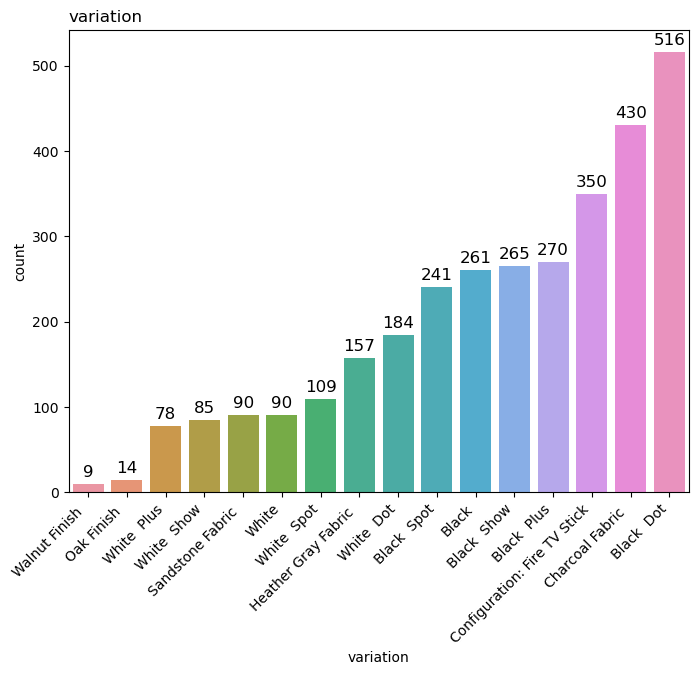

In [15]:
utils.barplot(data,column='variation',rotation=True)

Los productos con mas valoraciones corresponden `Charcoal Fabric` y `Black Dot` que resultan ser los esteticamente mas agradables.

In [5]:
# veamos la longitud de valoracion en el texto
data['length'] = data['verified_reviews'].apply(len)

In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


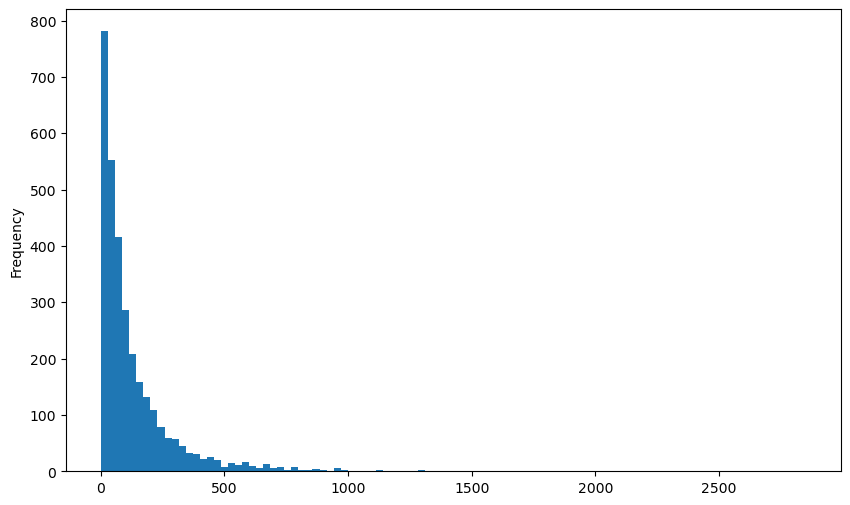

In [8]:
data.length.plot(bins=100,kind='hist',figsize=(10,6))
plt.show()

En el grafico de histograma se observa que tenemos gran cantidad de valoraciones con texto corto y muy raro ver texto largos. podriamos decir que a las personas no les gusta escribir muy mucho en estos tipos de comentarios.

In [17]:
data.length.describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

En promedio tenemos textos de 132 caracteres, además existen personas con valoraciones de un solo caracter y personas con 2851 caracteres.

In [18]:
# veamos la muestra con un solo caracter
data[data['length']==1]['verified_reviews'].iloc[0]

'😍'

In [19]:
# y que hay de la persona que se divertio escribiendo
data.loc[data['length']==2851,'verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [6]:
# Dividamos los datos en positivos y negativos para analisarlos por separado
positivo = data[data['feedback']==1]
negativo = data[data['feedback']==0] 

In [21]:
# veamos los procentajes 
negativo.shape[0]/3149,positivo.shape[0]/3149

(0.08129564941251191, 0.9187043505874881)

In [7]:
# escojamos solo las palabras relevantes
def filtro(data='data') -> str: 
    irrelevante = 'alexa device amazon echo dot'
    frases = data['verified_reviews'].tolist()
    new_frases =[]
    for lista in frases:
        for a in lista.lower().split():
            if a not in irrelevante:
                new_frases.append(a)
    new = ' '.join(new_frases)
    return new

In [9]:
from wordcloud import WordCloud

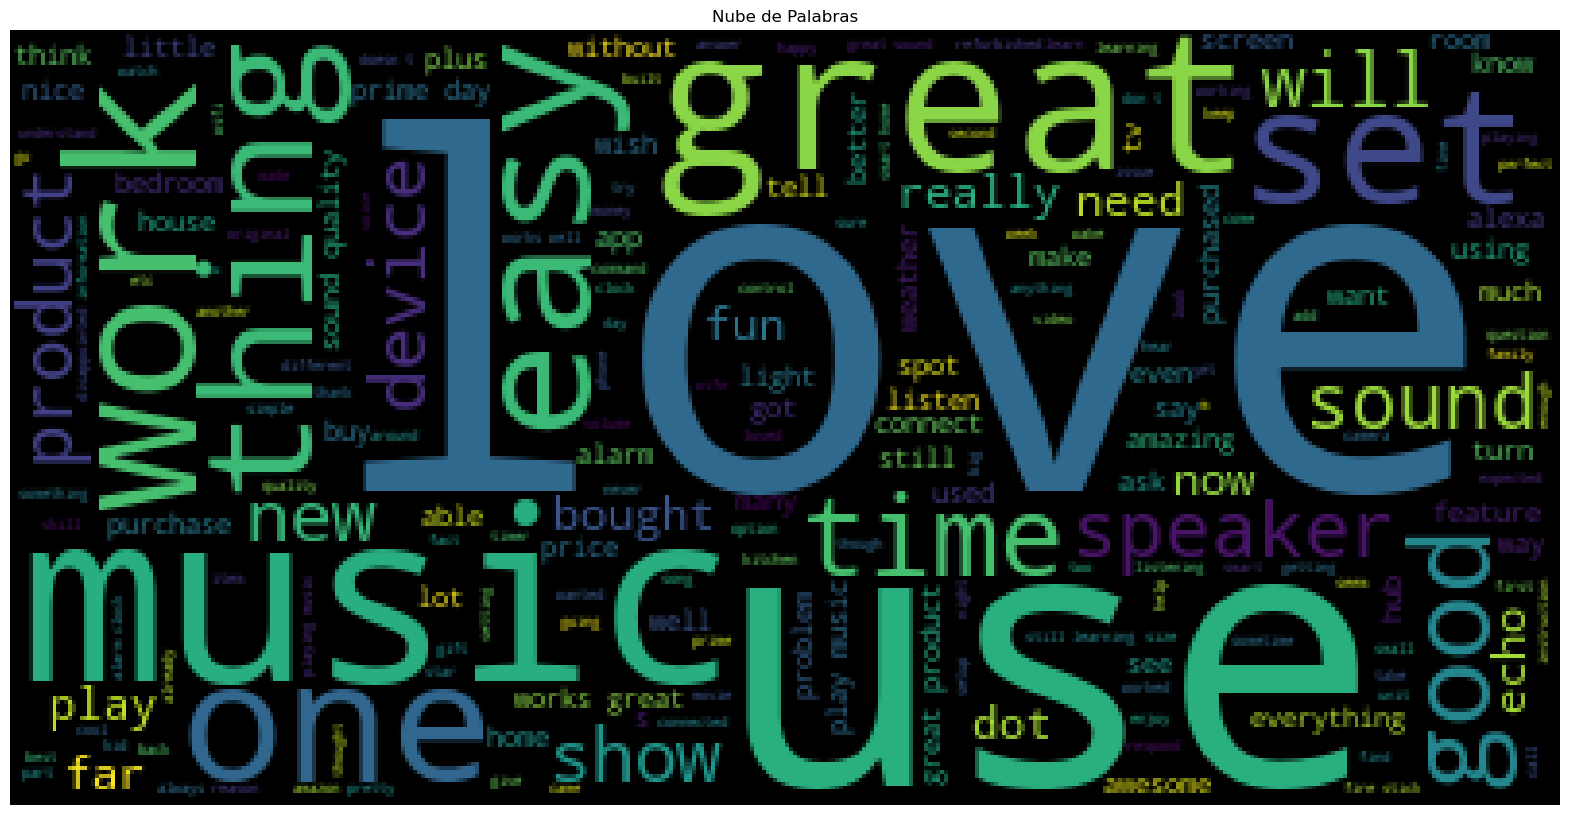

In [10]:
wordcloud = WordCloud().generate(filtro(data))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.title('Nube de Palabras')
plt.axis('off')
plt.show()

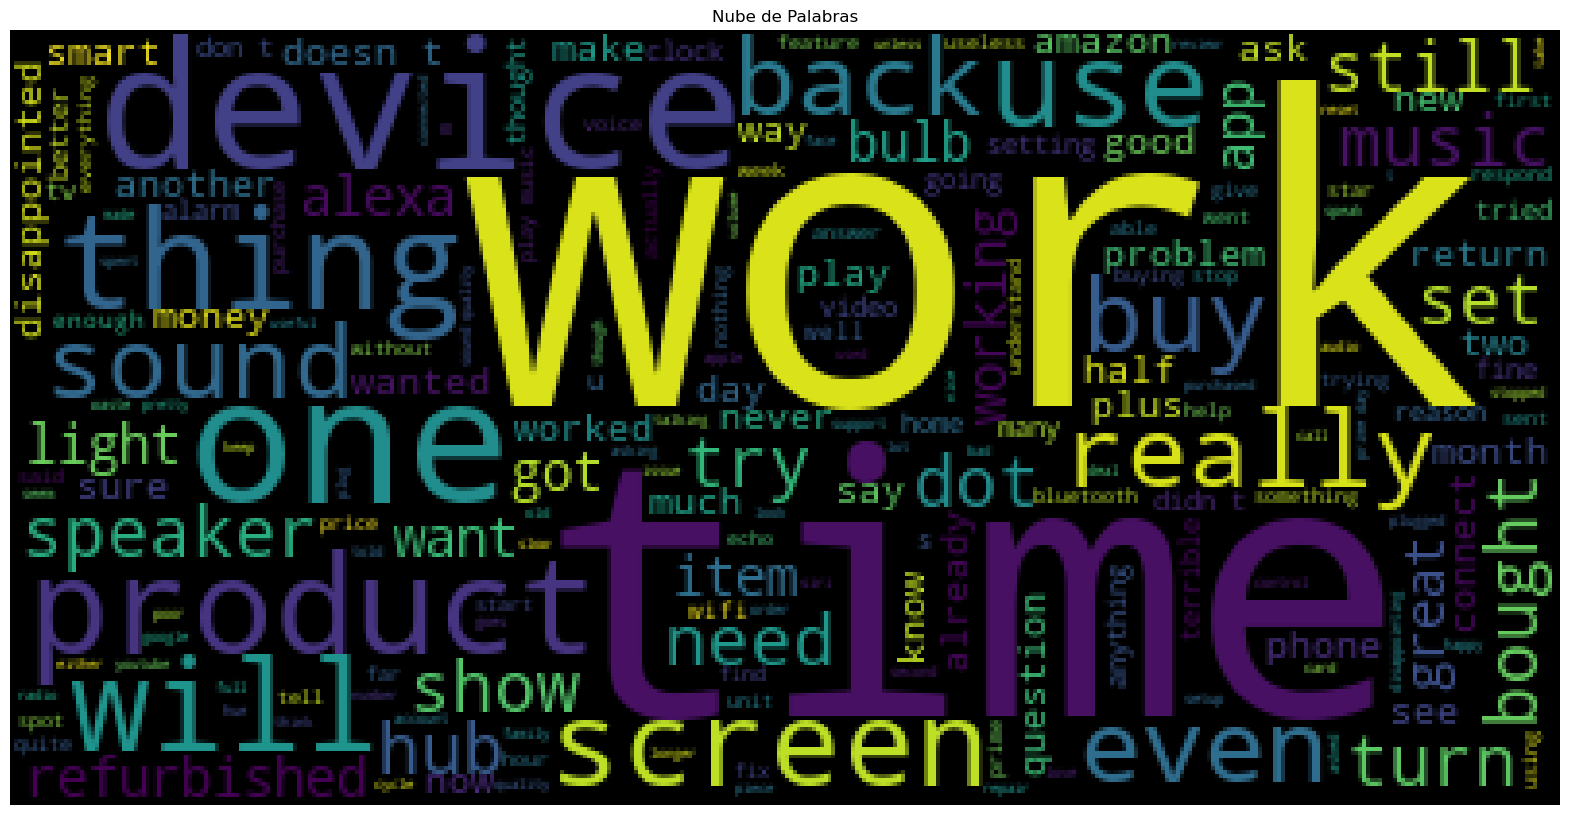

In [11]:

wordcloud = WordCloud().generate(filtro(negativo))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.title('Nube de Palabras')
plt.axis('off')
plt.show()

In [ ]:
# save the data
data.drop(columns=['date','rating']).to_csv('../Data/data_preproce.csv',index=False)
